In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telcom-customer-churn/Telco-Customer-Churn.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns  
df = pd.read_csv('/kaggle/input/telcom-customer-churn/Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# replace blanks total charges with 0 as tenure is 0 and converting data type from object to float datatype

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)
df["TotalCharges"] = df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

0

# convert 0 and 1 values of senior citizen to yes/no to make it easier to understand

In [9]:
def conv(value):
    if value == 1:
        return "yes"
    else:   
        return "no"
df["SeniorCitizen"]  =  df["SeniorCitizen"].apply(conv)  
df.head(20)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,no,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,no,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,no,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,no,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,no,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


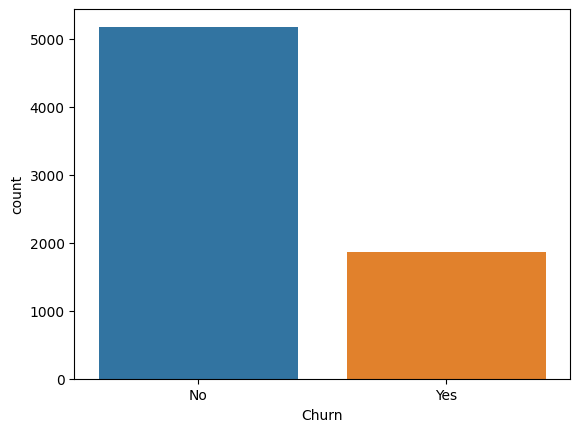

In [11]:
sns.countplot(x =df['Churn'] ,data= df )
plt.show()

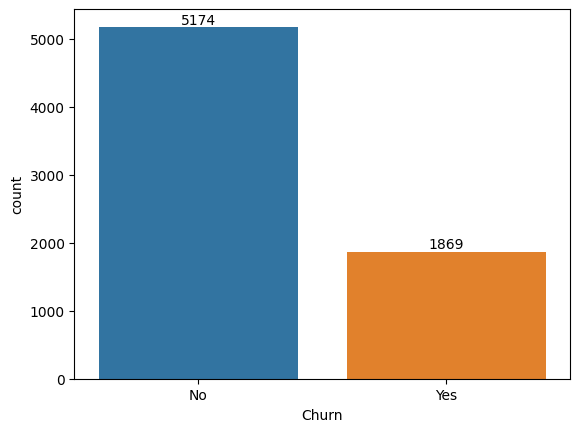

In [12]:
ax = sns.countplot(x =df['Churn'] ,data= df )
ax.bar_label(ax.containers[0])
plt.show()

# countplot using matplotlib pyplt

Churn
No     5174
Yes    1869
Name: count, dtype: int64


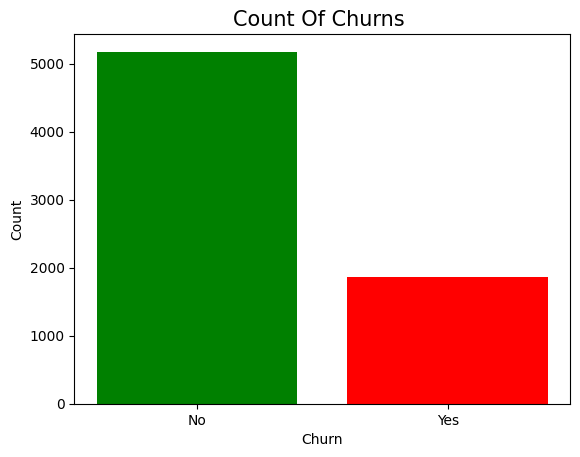

In [13]:
count = df["Churn"].value_counts()
print(count)

plt.bar(count.index, count,color=['green','red']) 
plt.xlabel('Churn')
plt.ylabel('Count')
plt.title('Count Of Churns ' ,fontsize =15)
plt.show()

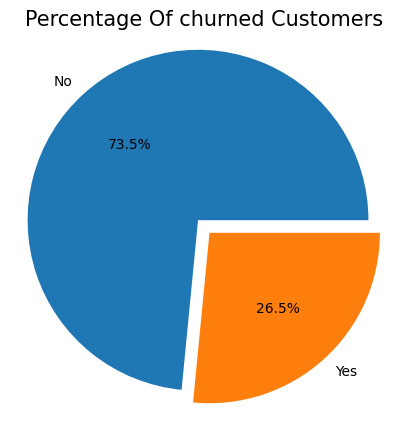

In [14]:
plt.figure(figsize=(5,5))
plt.pie(count, labels = count.index,autopct = "%1.1f%%",explode= [0,0.1])
plt.axis("equal")
plt.title('Percentage Of churned Customers', fontsize= 15)
plt.show()

# from the given pie chart we can conclude that 26.5% of our customers have churned out.
# now let's explore the reason behind it


SeniorCitizen
no     5901
yes    1142
Name: count, dtype: int64


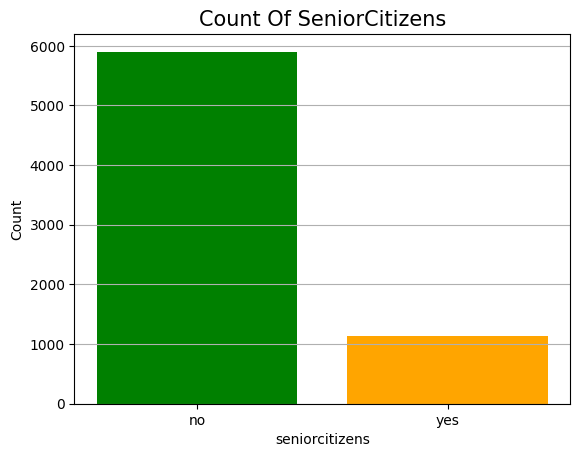

In [15]:
count = df["SeniorCitizen"].value_counts()
print(count)

plt.bar(count.index, count,color=['green','orange']) 
plt.grid(axis = 'y')
plt.xlabel('seniorcitizens')
plt.ylabel('Count')
plt.title('Count Of SeniorCitizens' ,fontsize =15)
plt.show() 

Churn            No   Yes
SeniorCitizen            
no             4508  1393
yes             666   476


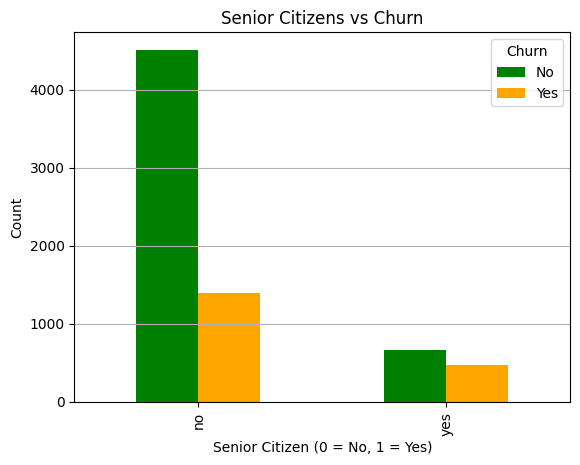

In [16]:


# Group by SeniorCitizen and Churn
count = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()

print(count)

# Plot grouped bars
count.plot(kind="bar", stacked=False, color=["green", "orange"])

plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Senior Citizens vs Churn")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.grid(axis='y')
plt.show()


Churn            No   Yes
SeniorCitizen            
no             4508  1393
yes             666   476


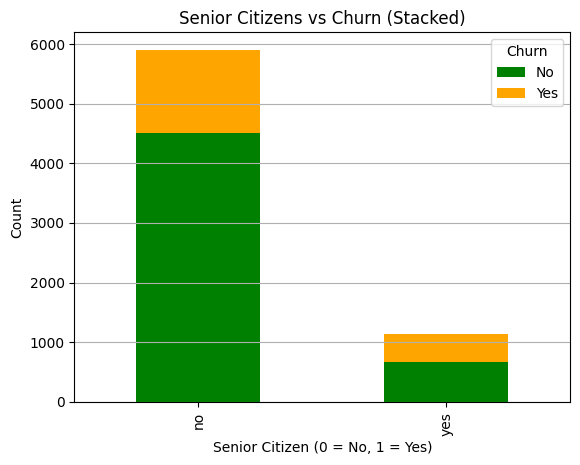

In [17]:


# Group by SeniorCitizen and Churn
count = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()

print(count)

# Plot stacked bars
count.plot(kind="bar", stacked=True, color=["green", "orange"])

plt.xlabel("Senior Citizen (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.title("Senior Citizens vs Churn (Stacked)")
plt.legend(title="Churn", labels=["No", "Yes"])
plt.grid(axis='y')
plt.show()


gender
Male      3555
Female    3488
Name: count, dtype: int64


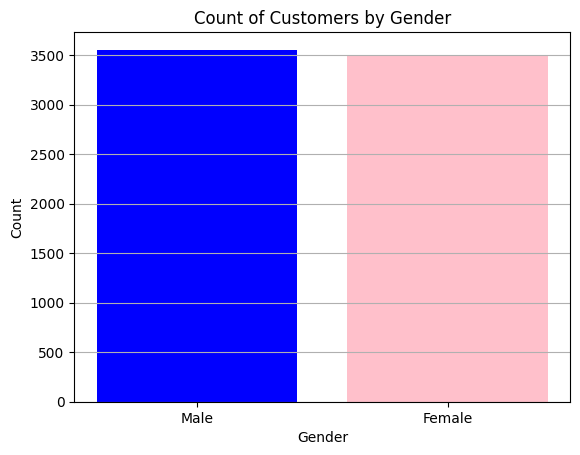

In [18]:


# Count genders
gender_count = df["gender"].value_counts()
print(gender_count)

# Plot bar chart
plt.bar(gender_count.index, gender_count.values, color=["blue", "pink"])

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Count of Customers by Gender")
plt.grid(axis='y')
plt.show()



Churn     No  Yes
gender           
Female  2549  939
Male    2625  930


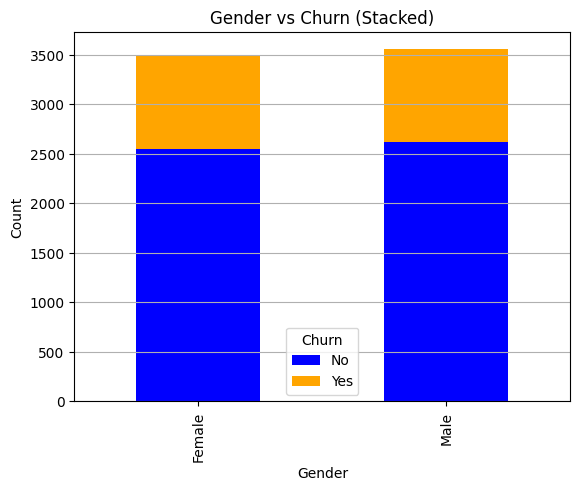

In [19]:


# Group by Gender and Churn, then count
gender_churn_count = df.groupby(["gender", "Churn"]).size().unstack()

print(gender_churn_count)

# Plot stacked bars
gender_churn_count.plot(kind="bar", stacked=True, color=["blue", "orange"])

plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender vs Churn (Stacked)")
plt.legend(title="Churn")
plt.grid(axis='y')
plt.show()


# comparitively a greater number of people in senior citizen have churned  

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


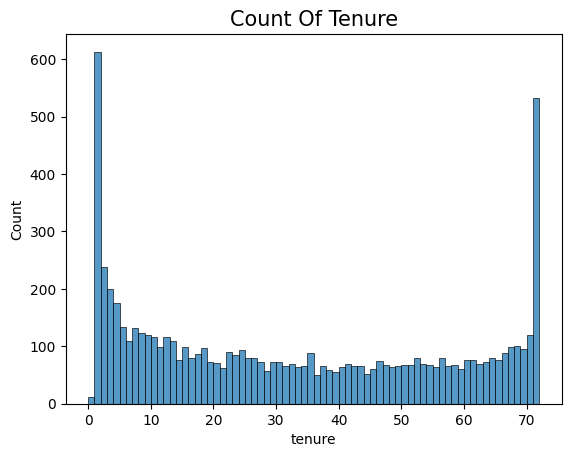

In [20]:
sns.histplot(x= df["tenure"],data = df, bins = 72,)
plt.title('Count Of Tenure',fontsize=15)
plt.show()



# maximum people have taken 1 month of services followed by 72 months srvices

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

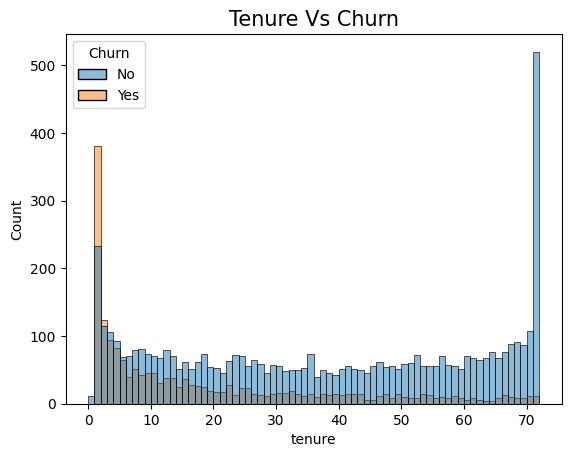

In [21]:
sns.histplot(x= df["tenure"],data = df, bins = 72,hue = df["Churn"])
plt.title('Tenure Vs Churn',fontsize=15)
plt.show()

# people who have used our services for a long time have stayed and people who have used our services for 1 or 2 months have churned

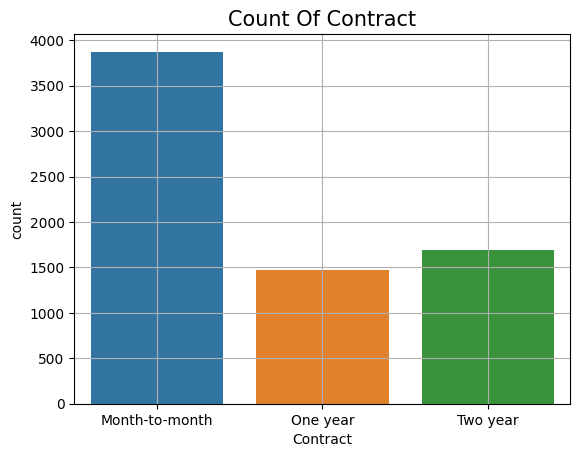

In [22]:
sns.countplot(x=df["Contract"],data= df)
plt.title('Count Of Contract',fontsize=15)
plt.xlabel('Contract')
plt.grid('y')
plt.show()


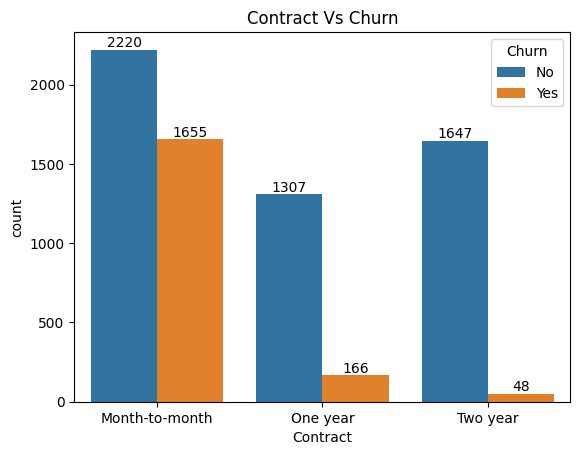

In [23]:
ax =sns.countplot(x='Contract',data=df,hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Contract Vs Churn')
plt.show()


# people who have month to month contract are likely to churn than from those who have 1 or 2 years of contract

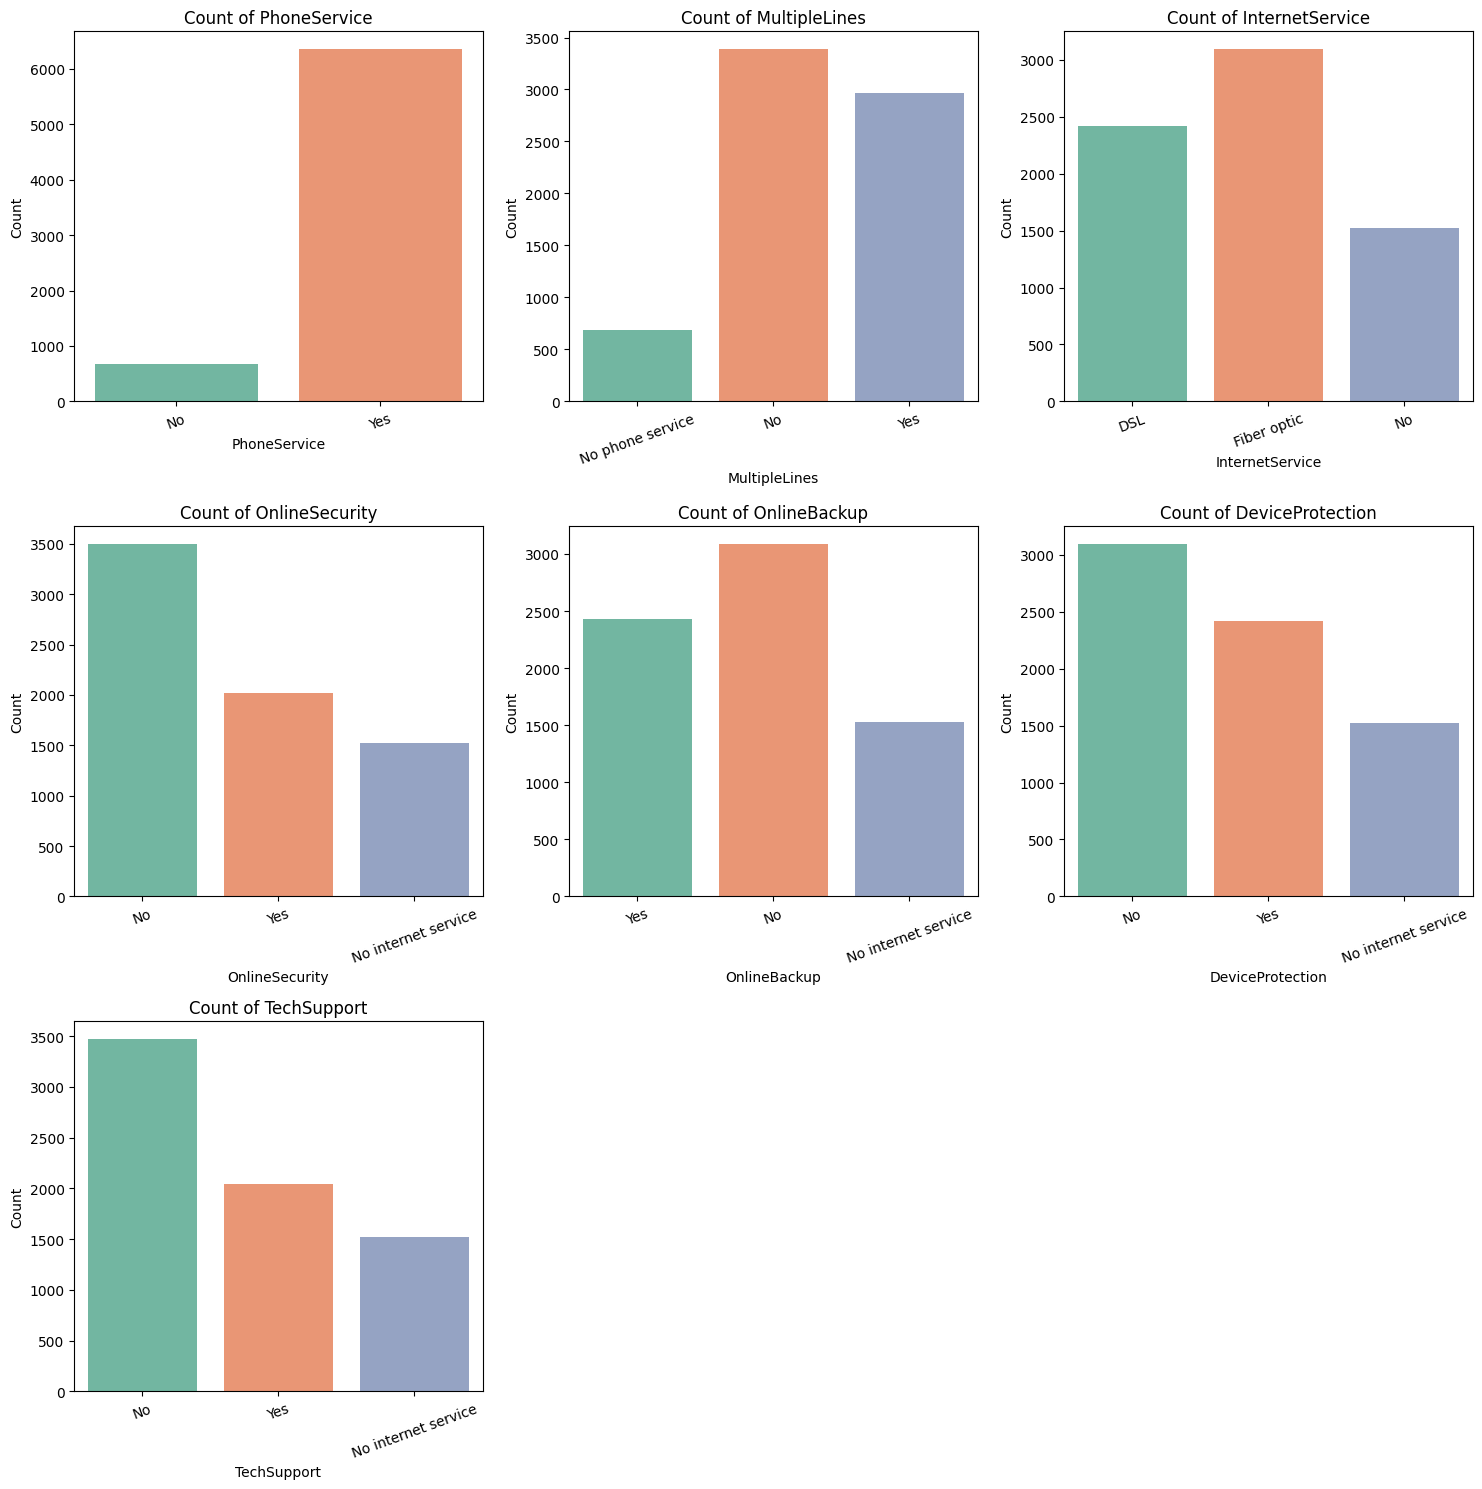

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of columns to plot
cols = ["PhoneService", "MultipleLines", "InternetService", 
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]

# Set figure size and layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  
axes = axes.flatten()  # flatten axes for easy iteration

# Plot each column
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, palette="Set2", ax=axes[i])
    axes[i].set_title(f"Count of {col}", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=20)  # rotate labels for readability

# Remove any unused subplot spaces
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


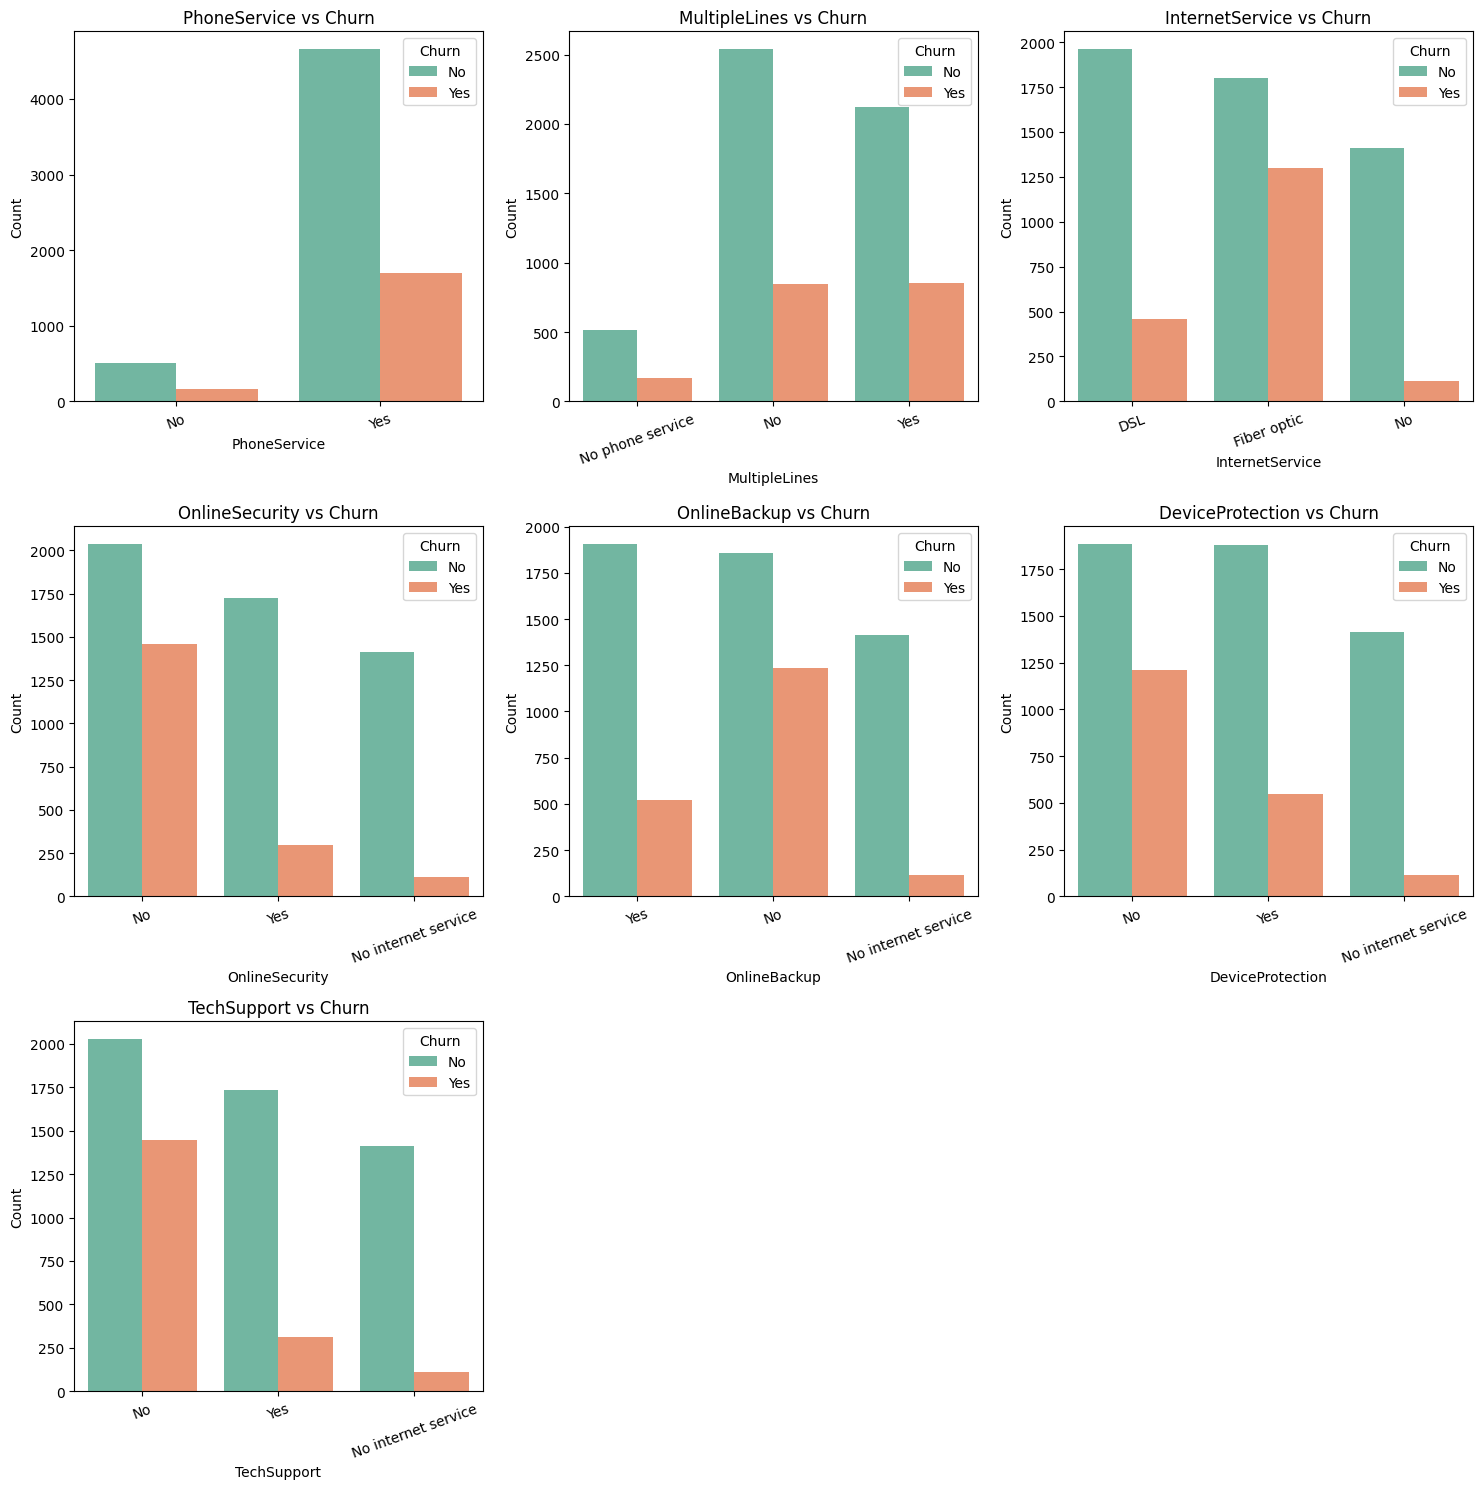

In [25]:


# List of columns to plot
cols = ["PhoneService", "MultipleLines", "InternetService", 
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]

# Set figure size and layout
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))  
axes = axes.flatten()  # flatten axes for easy iteration

# Plot each column with Churn as hue
for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, hue="Churn", palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=20)  # rotate labels for readability

# Remove any unused subplot spaces
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()





# the majority of customers who do not churn tend to have services 

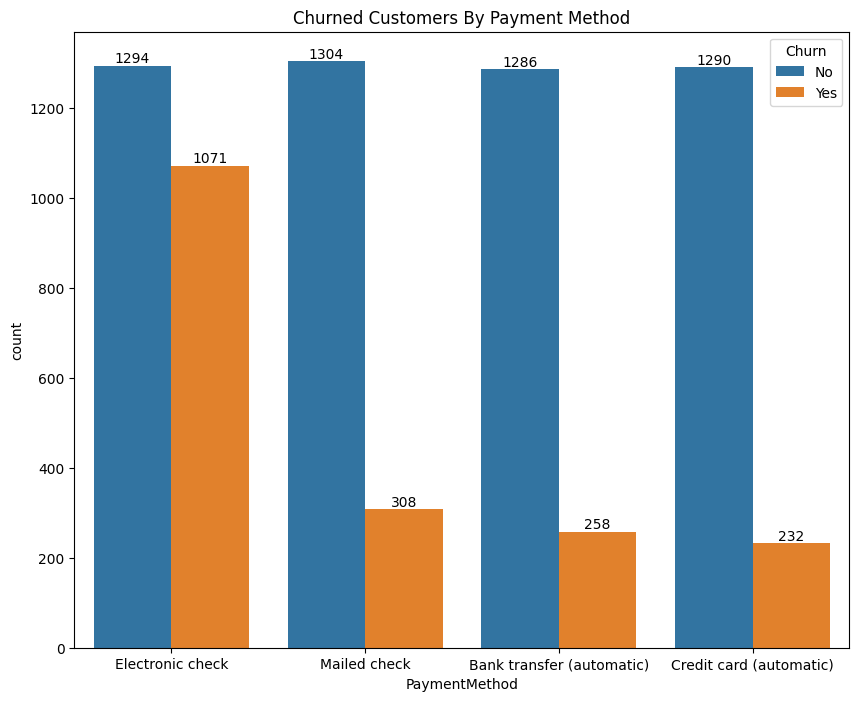

In [26]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x='PaymentMethod',data=df,hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers By Payment Method')
plt.show()

# customer is likely to churn when he is using electronic check as a payment mode